In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

In [36]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8851 - loss: 0.3117 - val_accuracy: 0.8778 - val_loss: 0.3409
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8902 - loss: 0.2902 - val_accuracy: 0.8822 - val_loss: 0.3286
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9017 - loss: 0.2691 - val_accuracy: 0.8867 - val_loss: 0.3206
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8997 - loss: 0.2663 - val_accuracy: 0.8843 - val_loss: 0.3267
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9072 - loss: 0.2493 - val_accuracy: 0.8798 - val_loss: 0.3309


In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8748 - loss: 0.3491
Test accuracy: 0.8761000037193298


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


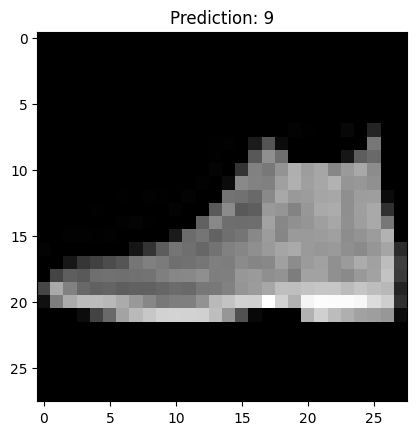

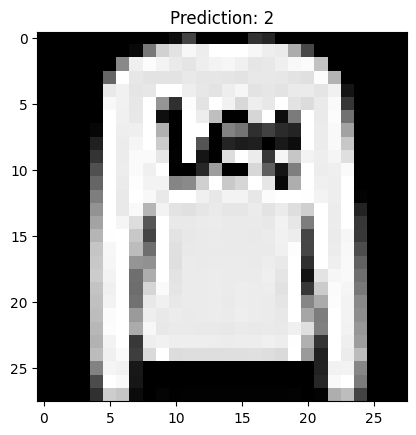

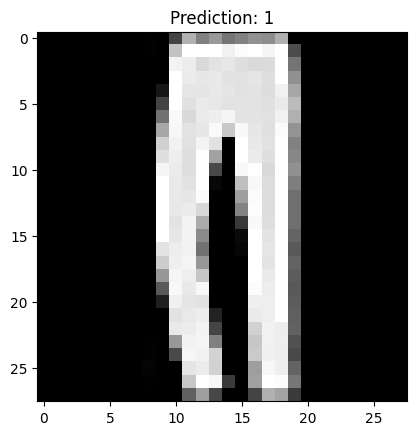

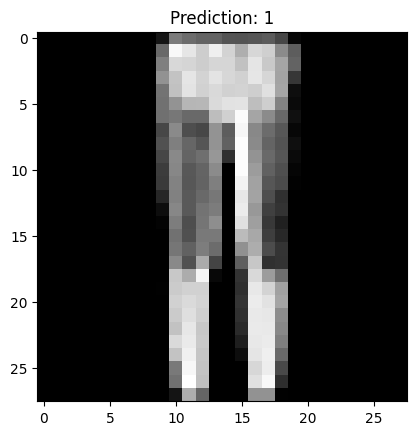

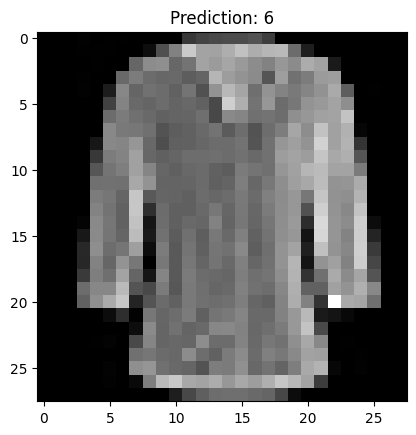

In [42]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(predictions[i])}")
    plt.show()

In [43]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
incorrect_indices = np.where(predicted_labels != y_test)[0]

In [45]:
print(f"Number of incorrect predictions: {len(incorrect_indices)}")

Number of incorrect predictions: 1239


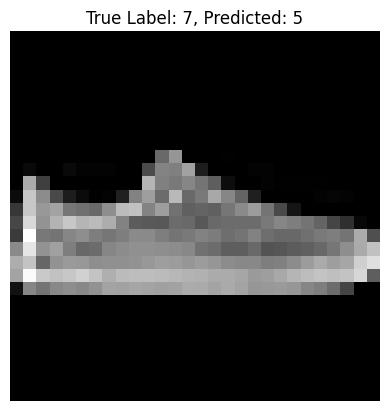

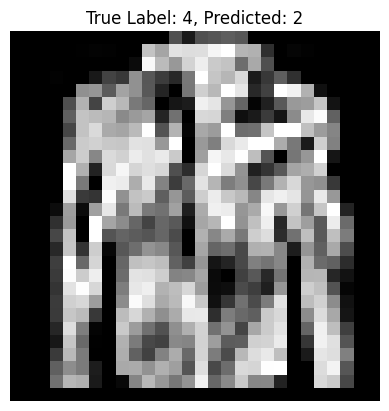

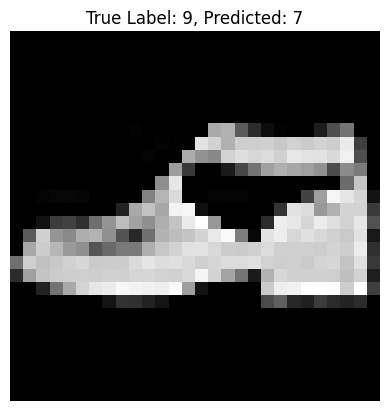

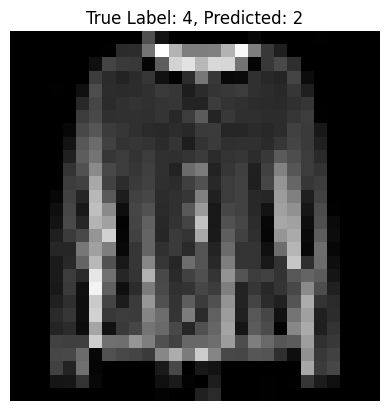

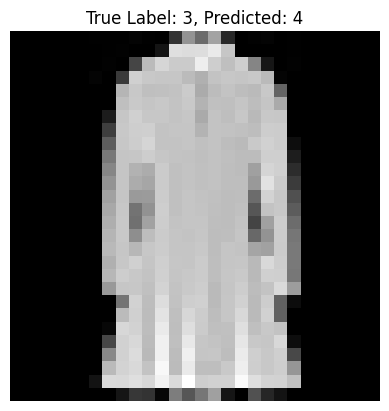

In [46]:
for i in range(5):
    index = incorrect_indices[i]
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_test[index]}, Predicted: {predicted_labels[index]}")
    plt.axis('off')
    plt.show()